In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy.linalg as la
import matplotlib.style as style

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# print(mpl.rcParams['font.size'])
mpl.rcParams['font.size'] = 13.5

# Crypten

In [19]:
crypten_data = pd.read_csv('../chz-sok-nn-experiments/crypten_experiments/datasize_nn.csv',
                           skiprows=(lambda x: (x % 2 != 0)),
                           header=None,
                           )
# epoch_duration, epoch, batch_size, data_size, accuracy, test_duration
crypten_data.columns = ['epoch_duration', 'epoch', 'batch_size', 'data_size', 'accuracy', 'test_duration']

# crypten_data = crypten_data.drop(index=range(14))

print(crypten_data)

mean_crypten = crypten_data.groupby('data_size')['epoch_duration'].sum()
print(mean_crypten)

# stdev_crypten = crypten_data.groupby('data_size')['epoch_duration'].std()
# print(stdev_crypten)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
0       334.103506      0          64       7500    0.1213     115.350260
1       330.811416      1          64       7500    0.1621     115.805684
2       330.879101      2          64       7500    0.2365     115.004239
3       663.143592      0          64      15000    0.1244     117.321772
4       668.208064      1          64      15000    0.1715     117.992892
5       667.907569      2          64      15000    0.3042     116.648248
6      1315.456388      0          64      30000    0.2173     114.857552
7      1313.133419      1          64      30000    0.2820     116.150094
8      1328.334851      2          64      30000    0.4606     114.715113
9      2537.499688      0          64      60000    0.3578     115.763435
10     2612.373227      1          64      60000    0.5357     128.444723
11     2707.107256      2          64      60000    0.5746     115.908757
data_size
7500      995.794023
15000  

# Plaintext Torch

In [20]:
torch_data = pd.read_csv('../chz-sok-nn-experiments/torch_experiments/mnist/mnist_total_time.csv',
                         header=None,
                         )
torch_data.columns = ['total_duration', 'data_size']

# print(torch_data)

torch_medians = torch_data.groupby('data_size')['total_duration'].median()
print(torch_medians)
torch_stdev = torch_data.groupby('data_size')['total_duration'].std()
print(torch_stdev)

data_size
7500      2.626104
15000     3.858952
30000     6.377122
60000    11.345573
Name: total_duration, dtype: float64
data_size
7500     0.022370
15000    0.030360
30000    0.044144
60000    0.045929
Name: total_duration, dtype: float64


# NVFlare

In [21]:
nvflare_medians = []
nvflare_stdevs = []
for datasize in [7500, 15000, 30000, 60000]:
    nvflare_data = pd.read_csv(f'../chz-sok-nvflare-experiments/fl-nn/experiments/mnist/{datasize}/total_time.csv',
                header=None,
                )
    # total_duration, run_id, timestamp
    nvflare_data.columns = ['total_duration', 'run_id', 'timestamp']
    nvflare_medians.append(nvflare_data['total_duration'].median())
    nvflare_stdevs.append(nvflare_data['total_duration'].std())
print(nvflare_medians)
print(nvflare_stdevs)

[32.1772215, 35.0571565, 38.004146, 43.956458]
[0.3470507609049593, 1.0130758237605801, 0.3052995578776146, 0.28762160001194825]


# Data Station

In [22]:
ds_data = pd.read_csv('../datastation-escrow/examples/training_scenario/mnist/mnist_total_time.csv',
                        header=None,
                        )
# total_duration, data_size
ds_data.columns = ['total_duration', 'data_size']

ds_medians = ds_data.groupby('data_size')['total_duration'].median()
ds_stdevs = ds_data.groupby('data_size')['total_duration'].std()

print(ds_medians)
print(ds_stdevs)

data_size
7500      7.317240
15000     8.502715
30000    10.905158
60000    15.664348
Name: total_duration, dtype: float64
data_size
7500     0.172851
15000    0.049639
30000    0.095084
60000    0.155105
Name: total_duration, dtype: float64


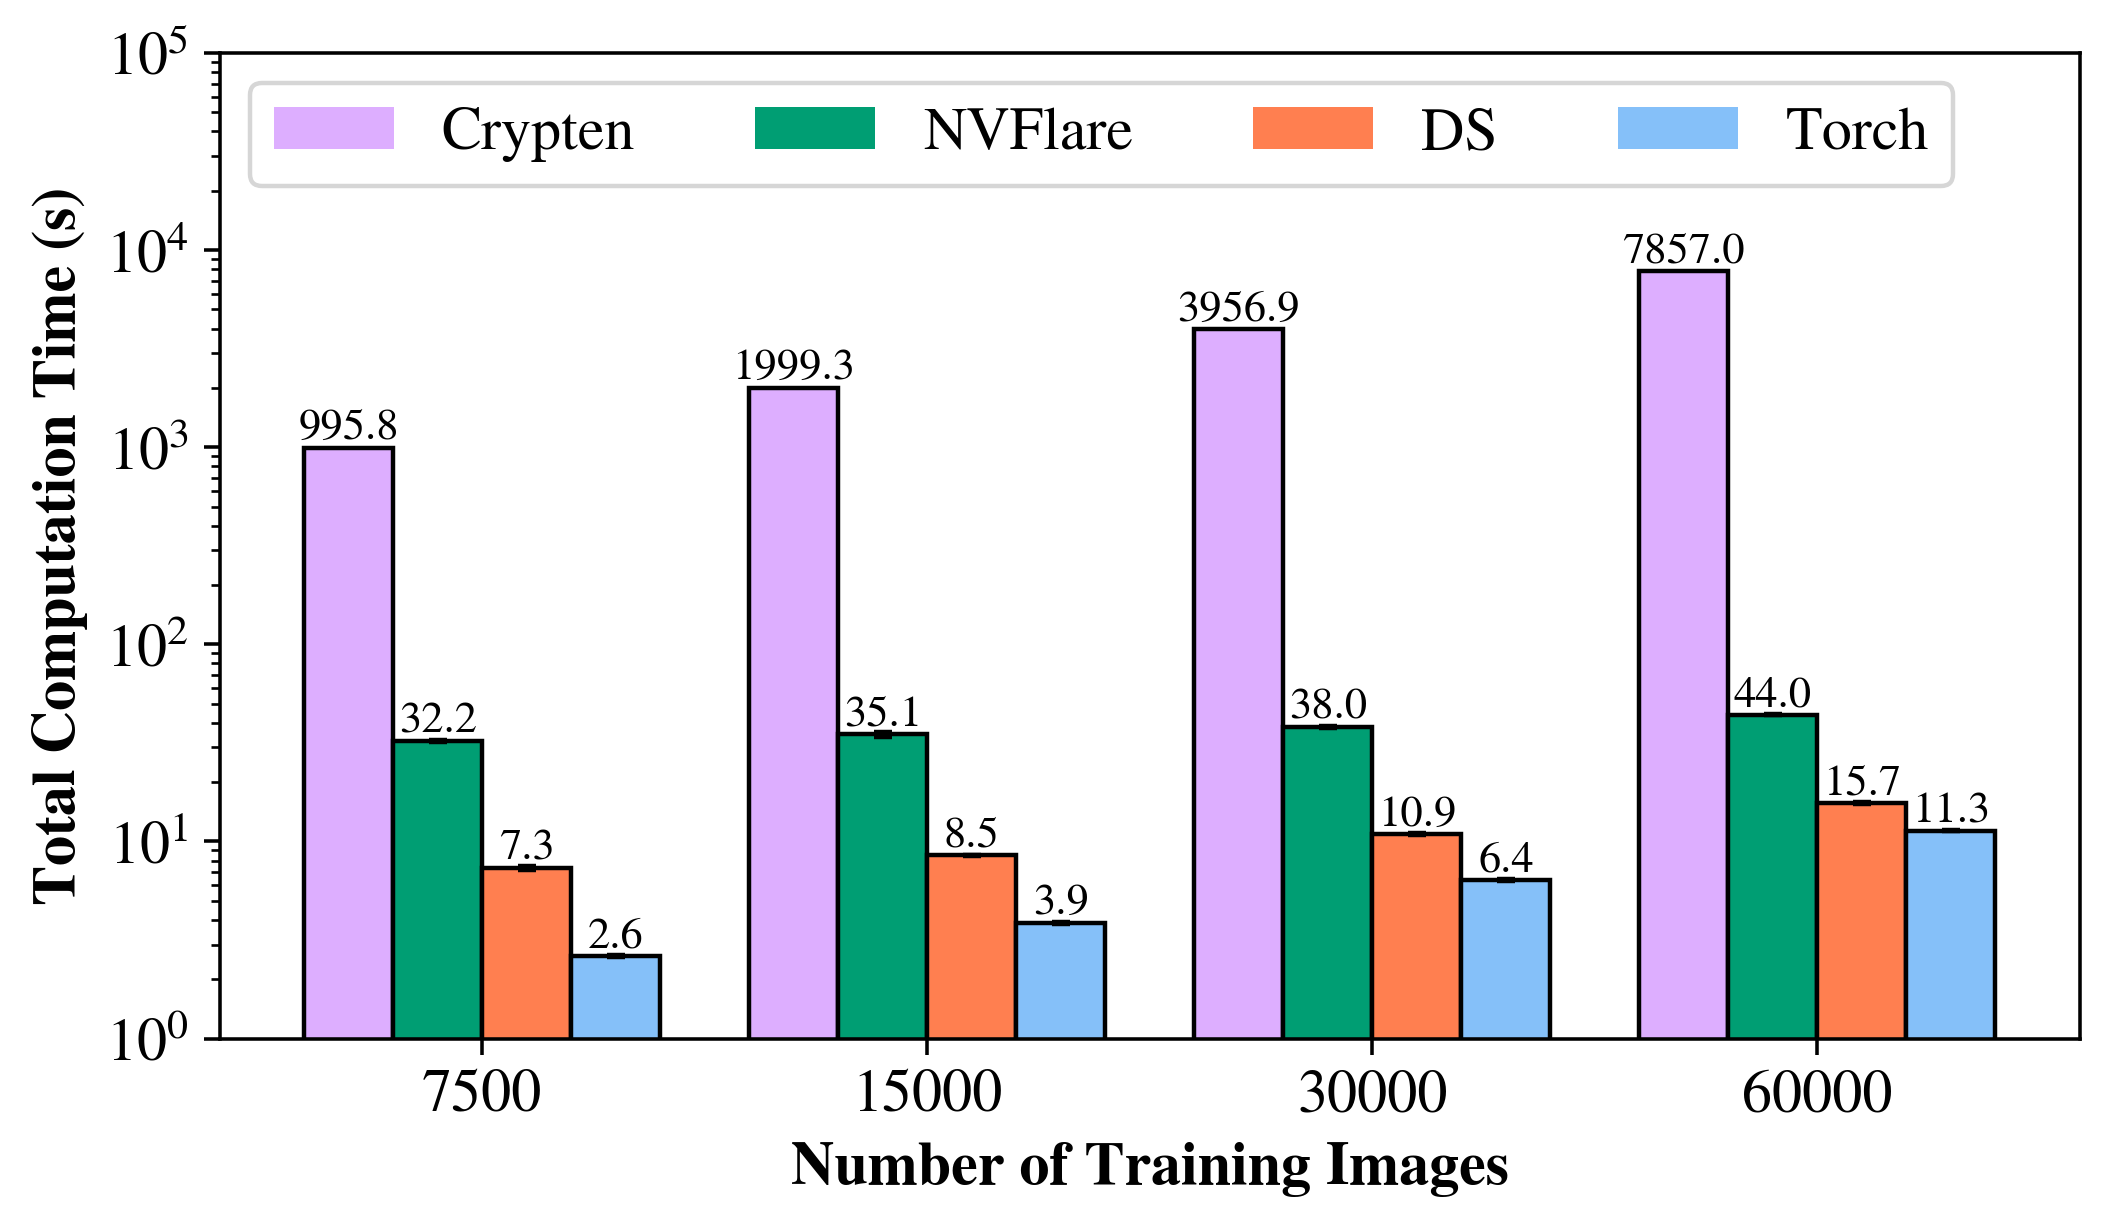

In [23]:
bar_label_font_size = 10
X_axis = np.arange(4)+1
width = 0.2

plt.figure(figsize=(7.5, 4), dpi=320)

# Crypten
crypten_bar = plt.bar(x=X_axis-1.5*width, width=width, height = mean_crypten, label = "Crypten", color='#ddaeff')
plt.bar(x=X_axis-1.5*width,width=width,height=mean_crypten,
        # yerr=conclave_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
crypten_label = map(lambda n: '{0:.1f}'.format(n),mean_crypten)
plt.bar_label(crypten_bar, crypten_label, fontsize=bar_label_font_size)

# NVFlare
nvflare_bar = plt.bar(x=X_axis-0.5*width, width=width, height = nvflare_medians, label = "NVFlare", color='#009E73')
plt.bar(x=X_axis-0.5*width,width=width,height=nvflare_medians,yerr=nvflare_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
nvflare_label = map(lambda n: '{0:.1f}'.format(n),nvflare_medians)
plt.bar_label(nvflare_bar, nvflare_label, fontsize=bar_label_font_size)


# Data Station
ds_bar = plt.bar(x=X_axis+0.5*width, width=width, height = ds_medians, label = "DS", color='coral')
plt.bar(x=X_axis+0.5*width,width=width,height=ds_medians,yerr=ds_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
ds_label = map(lambda n: '{0:.1f}'.format(n),ds_medians)
plt.bar_label(ds_bar, ds_label, fontsize=bar_label_font_size)

# Torch
torch_bar = plt.bar(x=X_axis+1.5*width, width=width, height = torch_medians, label = "Torch", color='#85C0F9')
plt.bar(x=X_axis+1.5*width,width=width,height=torch_medians,
        yerr=torch_stdev,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
torch_label = map(lambda n: '{0:.1f}'.format(n),torch_medians)
plt.bar_label(torch_bar, torch_label, fontsize=bar_label_font_size)

plt.yscale('log')
plt.ylim(1, 100000)

plt.xlabel("Number of Training Images", fontweight="bold")
plt.ylabel("Total Computation Time (s)", fontweight="bold")
# plt.title("Basic NN Training Time on FashionMNIST")
plt.legend(ncols=4, loc='upper left')

plt.xticks(X_axis, ["7500", "15000", "30000", "60000"])

plt.savefig("datasize_mnist_nn.pdf", bbox_inches='tight')

plt.show()

# Accuracy

## Data Station

In [24]:
ds_acc = pd.read_csv('../datastation-escrow/examples/training_scenario/mnist/mnist.csv',
                        # header=None,
                        )
ds_acc = ds_acc[ds_acc['epoch'] == '2']

ds_acc_medians = ds_acc.groupby('data_size')['accuracy'].median()
# ds_stdevs = ds_data.groupby('data_size')['total_duration'].std()

print(ds_acc_medians)
# print(ds_stdevs)

data_size
15000    0.3598
30000    0.5457
60000    0.6117
7500     0.2913
Name: accuracy, dtype: object


## Plaintext

In [25]:
torch_acc = pd.read_csv('../chz-sok-nn-experiments/torch_experiments/mnist/mnist.csv',)

# epoch_duration, epoch, batch_size, data_size, accuracy, test_duration
torch_acc.columns = ['epoch_duration', 'epoch', 'batch_size', 'data_size', 'accuracy', 'test_duration']
torch_acc = torch_acc[torch_acc['epoch'] == 2]

torch_acc_medians = torch_acc.groupby('data_size')['accuracy'].median()
print(torch_acc_medians)

data_size
7500     0.2617
15000    0.3677
30000    0.5152
60000    0.6167
Name: accuracy, dtype: float64


## NVFlare

In [26]:
for datasize in [7500, 15000, 30000, 60000]:
    nvflare_acc = pd.read_csv(f'../chz-sok-nvflare-experiments/fl-nn/experiments/mnist/{datasize}/datasize_mnist_nn.csv',)
    nvflare_acc.columns = ['accuracy', 'epoch', 'batch_size', 'data_size', 'site']

    nvflare_acc = nvflare_acc[nvflare_acc['batch_size'] != 64.0]
    nvflare_acc = nvflare_acc[nvflare_acc['site'] == 'site-1']
    # print(nvflare_acc)
    
    # get every third element
    nvflare_acc = nvflare_acc.iloc[::3, :]
    # print(nvflare_acc)

    nvflare_acc_medians = nvflare_acc['accuracy'].median()
    print(nvflare_acc_medians)


0.1473
0.25225
0.42655
0.5260499999999999


## Crypten

In [27]:
crypten_acc = crypten_data[crypten_data['epoch'] == 2]
crypten_acc_medians = crypten_acc.groupby('data_size')['accuracy'].median()
print(crypten_acc_medians)

data_size
7500     0.2365
15000    0.3042
30000    0.4606
60000    0.5746
Name: accuracy, dtype: float64
